First Iteration Results:
Cluster 1 members: ['P1', 'P2', 'P3', 'P4', 'P6']
Cluster 2 members: ['P5', 'P7', 'P8']

Updated Centroids after Iteration 1:
m1 = [0.148, 0.712]
m2 = [0.247, 0.2]

Answers:
1) P6 belongs to: Cluster 1
2) Population of cluster around m2: 3
3) Updated Centroids -> m1: [0.148, 0.712] , m2: [0.247, 0.2]


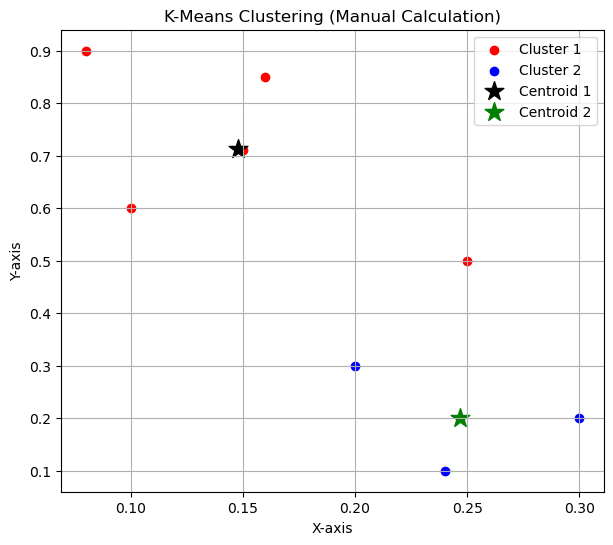

In [3]:
# =======================================
# Title: K-Means Clustering (Manual Method)
# Aim: To group data points into 2 clusters using Euclidean distance
# =======================================

import math
import matplotlib.pyplot as plt

# Step 1: Given data points (P1–P8)
points = {
    "P1": [0.1, 0.6],
    "P2": [0.15, 0.71],
    "P3": [0.08, 0.9],
    "P4": [0.16, 0.85],
    "P5": [0.2, 0.3],
    "P6": [0.25, 0.5],
    "P7": [0.24, 0.1],
    "P8": [0.3, 0.2]
}

# Step 2: Initialize centroids
m1 = points["P1"]   # Centroid of Cluster 1
m2 = points["P8"]   # Centroid of Cluster 2

# Function to calculate Euclidean distance
def distance(p, q):
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

# Step 3: Assign each point to the nearest centroid
def assign_clusters(m1, m2):
    C1, C2 = [], []
    for name, p in points.items():
        d1 = distance(p, m1)
        d2 = distance(p, m2)
        if d1 < d2:
            C1.append(name)
        else:
            C2.append(name)
    return C1, C2

# Step 4: Update centroids based on cluster mean
def update_centroid(cluster):
    x = sum(points[p][0] for p in cluster) / len(cluster)
    y = sum(points[p][1] for p in cluster) / len(cluster)
    return [round(x, 3), round(y, 3)]

# ---- First Iteration ----
C1, C2 = assign_clusters(m1, m2)

print("First Iteration Results:")
print("Cluster 1 members:", C1)
print("Cluster 2 members:", C2)

# Step 5: Calculate new centroids
m1_new = update_centroid(C1)
m2_new = update_centroid(C2)

print("\nUpdated Centroids after Iteration 1:")
print("m1 =", m1_new)
print("m2 =", m2_new)

# Step 6: Specific Questions (as in practical exam)
print("\nAnswers:")
print("1) P6 belongs to:", "Cluster 1" if "P6" in C1 else "Cluster 2")
print("2) Population of cluster around m2:", len(C2))
print("3) Updated Centroids -> m1:", m1_new, ", m2:", m2_new)

# Step 7: Plot the clusters
plt.figure(figsize=(7, 6))

# Plot points for Cluster 1
for p in C1:
    plt.scatter(points[p][0], points[p][1], color='red', label='Cluster 1' if p == C1[0] else "")

# Plot points for Cluster 2
for p in C2:
    plt.scatter(points[p][0], points[p][1], color='blue', label='Cluster 2' if p == C2[0] else "")

# Plot centroids
plt.scatter(m1_new[0], m1_new[1], color='black', marker='*', s=200, label='Centroid 1')
plt.scatter(m2_new[0], m2_new[1], color='green', marker='*', s=200, label='Centroid 2')

# Add labels and title
plt.title("K-Means Clustering (Manual Calculation)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


First five records of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster Labels assigned to data:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64


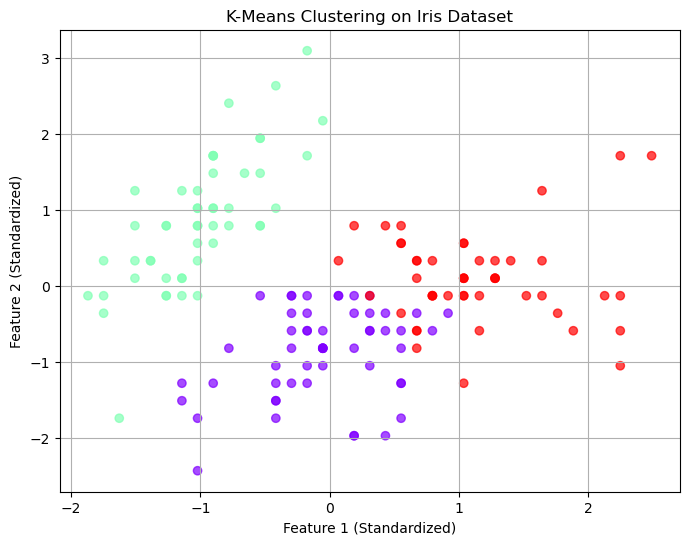


Cluster Centers (after scaling):
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [2]:
### Using dataset

# ==============================
# K-Means Clustering Algorithm
# ==============================

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Step 2: Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
print("First five records of dataset:")
print(X.head())

# Step 3: Standardize the data (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Step 5: Get cluster labels and centroids
X['Cluster'] = kmeans.labels_
print("\nCluster Labels assigned to data:")
print(X['Cluster'].value_counts())

# Step 6: Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(True)
plt.show()

# Step 7: Print cluster centroids
print("\nCluster Centers (after scaling):")
print(kmeans.cluster_centers_)
